In [ ]:
import ast
import holidays
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from pandas import DataFrame
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
'''
Get the pre processed data from the data folder.
'''
df = pd.read_csv( "data/final_data.csv")
# df

,budget,id,imdb_id,language,popularity,release_date,revenue,runtime,keyword,Day,Year,War,Romance,Western,Thriller,Family,Action,Adventure,Science Fiction,Horror,Animation,Foreign,Music,Crime,TV Movie,Fantasy,Mystery,Documentary,Comedy,Drama,History,is_holiday,is_near_holiday,Italy,Australia,United States of America,India,Canada,Other_Country,United Kingdom,France,Germany,cast,crew
0,30000000,862,tt0114709,1.0,21.946943,1995-10-30,373554033,81.0,7,0,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12,52
1,65000000,8844,tt0113497,1.0,17.015539,1995-12-15,262797249,104.0,2,4,1995,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12,14
2,16000000,31357,tt0114885,1.0,3.859495,1995-12-22,81452156,127.0,4,4,1995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9,7
3,60000000,949,tt0113277,1.0,17.924927,1995-12-15,187436818,170.0,17,4,1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40,53
4,35000000,9091,tt0114576,1.0,5.231580,1995-12-22,64350171,106.0,3,4,1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,11000000,395834,tt5362988,1.0,40.796775,2017-08-03,184770205,111.0,10,3,2017,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,9,10
5316,12000000,24049,tt0479751,0.0,1.323587,2007-06-14,19000000,185.0,0,3,2007,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,10
5317,800000,62757,tt0933361,1.0,0.903061,2006-11-23,1328612,100.0,0,3,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
5318,2000000,63281,tt1718881,1.0,0.121844,2010-09-30,1268793,107.0,0,3,2010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0


# PLOTS 

## 1. Genre vs Revenue 

In [ ]:
genre_set = {'Family', 'Animation', 'Thriller', 'Documentary', 'Music', 'Horror', 'Foreign', 'Western', 'TV Movie',
'Fantasy', 'Mystery', 'Action', 'Romance', 'History', 'Comedy', 'Adventure', 'War', 'Science Fiction', 'Crime', 'Drama'}

def get_genre_map(genre_set):
    genre_map={}
    ind=0
    for genres in genre_set:
    genre_map[genres]=ind
    ind+=1
    return genre_map

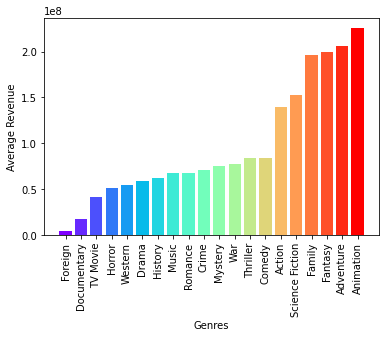

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot(x,y):
    colors = cm.rainbow(np.linspace(0, 1, 20))
    idx     = np.argsort(y)
    y = np.array(y)[idx]
    x = np.array(x)[idx]
    plt.bar(x,y,color=colors)
    # genre.xaxis_date() 
    plt.xticks(rotation=90) 
    plt.xlabel('Genres')
    plt.ylabel('Average Revenue') 
    plt.show()
    return

def get_array_genre_vs_revenue(movies,genre_set):
    ith_avg=np.zeros(len(genre_set),)
    genre_list=list(genre_set)
    genre_map=get_genre_map(genre_set)
    for genrename in genre_list:
    revenue_i = np.sum(
        np.multiply
         (
    movies['revenue'],
    movies[genrename]
         ))
    count_i = np.sum(movies[genrename])
    # print(revenue_i,count_i)
    ith_avg[genre_map[genrename]]= revenue_i/count_i
    return ith_avg
    
def plot_genre_vs_revenue(dataframe,genre_set):
    yarray= get_array_genre_vs_revenue(dataframe,genre_set)
    xarray= list(genre_set)
    plot(xarray,yarray)
    return
# df.dtypes
plot_genre_vs_revenue(df,genre_set)

## 2. Revenue Distribution 

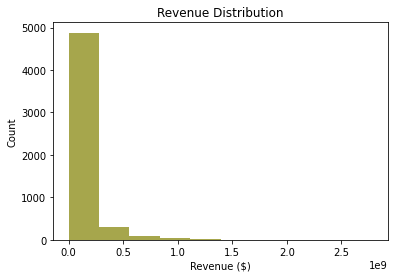

In [ ]:
def plot_revenue_distribution(movies):
    data=df['revenue'].tolist()
    data.sort()
    plt.hist(data,color="olive", alpha = 0.7)
    plt.xlabel('Revenue ($)')
    plt.ylabel('Count') 
    plt.title("Revenue Distribution")
    plt.show()
    plot_revenue_distribution(df)

## 3. Revenue vs Runtime

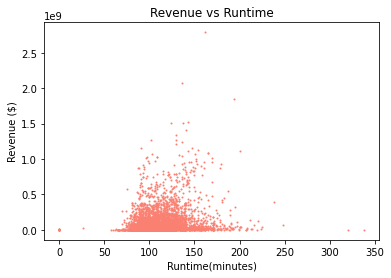

In [ ]:
# colors=[]
def plot_runtime_vs_revenue(df):
    yarray=df['revenue'].tolist()
    xarray=df['runtime'].tolist()
    plt.scatter(xarray,yarray,color="salmon",s = 1)
    plt.xlabel('Runtime(minutes)')
    plt.ylabel('Revenue ($)') 
    plt.title("Revenue vs Runtime")
    plt.show()
    return 
plot_runtime_vs_revenue(df)

## 4. Revenue vs Vote

In [ ]:
def plot_votes_vs_revenue(df):
    yarray=df['revenue'].tolist()
    xarray=df['vote_average'].tolist()
    plt.scatter(xarray,yarray, color="lightseagreen", s = 1)
    plt.xlabel('Average Votes')
    plt.ylabel('Revenue ($)') 
    plt.title("Revenue vs Votes")
    plt.show()
    return 
# plot_votes_vs_revenue(df)

## 5. Revenue vs Budget

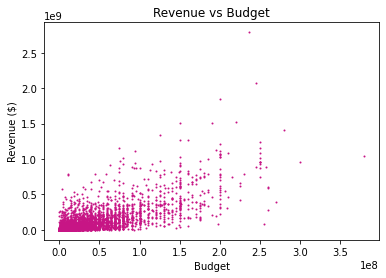

In [ ]:
def plot_revenue_vs_budget(df):
    yarray=df['revenue'].tolist()
    xarray=df['budget'].tolist()
    plt.scatter(xarray,yarray, color="mediumvioletred", s = 1)
    plt.xlabel('Budget')
    plt.ylabel('Revenue ($)') 
    plt.title("Revenue vs Budget")
    plt.show()
    return 
plot_revenue_vs_budget(df)

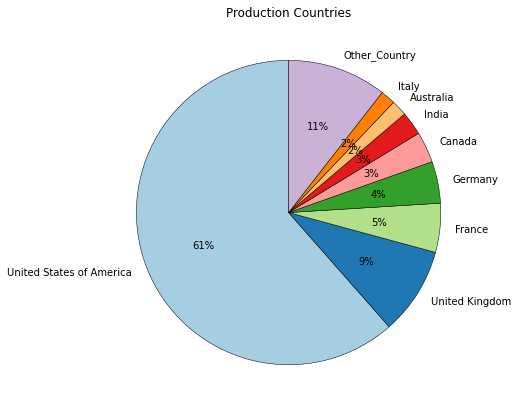

In [ ]:
c = ['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Australia', 'Italy', 'Other_Country']
val = []
for i in range(len(c)):
    temp = df.loc[df[c[i]] == 1]
    val.append(temp.shape[0])

fig = plt.figure(figsize = (10, 7))
colors = sns.color_palette("Paired",10)
plt.pie(val, labels = c, colors = colors, 
        startangle=90, 
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True},    autopct='%1.0f%%')
plt.title('Production Countries')
plt.show()

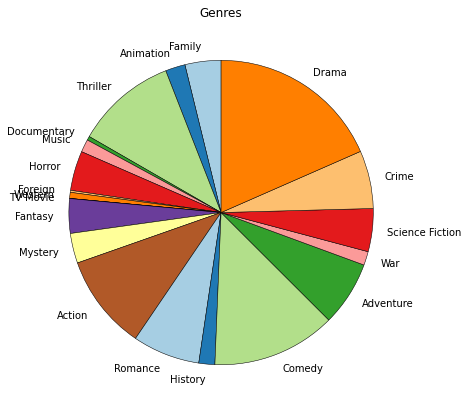

In [ ]:
g = ['Family', 'Animation', 'Thriller', 'Documentary', 'Music', 'Horror', 'Foreign', 'Western', 'TV Movie', 'Fantasy', 'Mystery', 'Action', 'Romance', 'History', 'Comedy', 'Adventure', 'War', 'Science Fiction', 'Crime', 'Drama']
val = []
for i in range(len(g)):
    temp = df.loc[df[g[i]] == 1]
    val.append(temp.shape[0])

fig = plt.figure(figsize = (10, 7))
colors = sns.color_palette("Paired",20)
plt.pie(val, labels = g, colors = colors, startangle=90, wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
plt.title('Genres')
plt.show()

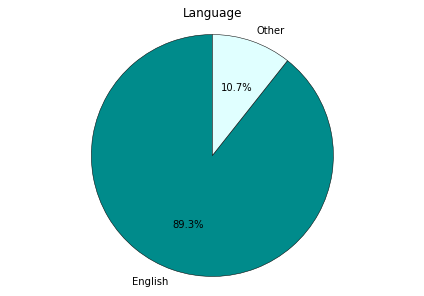

In [ ]:
l = ['English', 'Other']
val = []
count = df.loc[df['language'] == 1].shape[0]
val.append(count)
temp = df.shape[0] - count
val.append(temp)

colors = ['darkcyan', 'lightcyan']
fig1, ax1 = plt.subplots()
ax1.pie(val, colors = colors, labels = l, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
ax1.axis('equal')    
plt.tight_layout()
plt.title('Language')
plt.show()

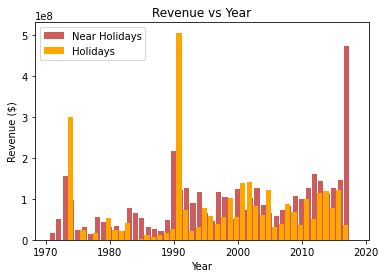

In [ ]:
def plot_revenue_vs_year_helper(revenues, years):
    map = {}
    for i in range(len(revenues)):
    if years[i] in map:
        map[years[i]][0] += revenues[i]
        map[years[i]][1] += 1
    else:
        map[years[i]] = [revenues[i], 1]

    new_revenues = []
    new_years = []

    for itr in map:
    new_revenues.append(map[itr][0] / map[itr][1])
    new_years.append(itr)

    new_revenues = np.array(new_revenues, dtype = 'float32')
    new_years = np.array(new_years, dtype = 'float32')
    
    return new_revenues, new_years

def plot_revenue_vs_year():

    x = df.to_numpy()
    y = df.to_numpy()

    n_plot = 5380 # number of data points to plot

    M = df.shape[0]

    revenue_holidays = []
    year_holidays = []

    revenue_near_holidays = []
    year_near_holidays = []

    for i in range(M):
    if (df.iloc[i]['is_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
        revenue_holidays.append(df.iloc[i]['revenue'])
        year_holidays.append(df.iloc[i]['Year'])
    if (df.iloc[i]['is_near_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
        revenue_near_holidays.append(df.iloc[i]['revenue'])
        year_near_holidays.append(df.iloc[i]['Year'])

    revenue_holidays, year_holidays = plot_revenue_vs_year_helper(revenue_holidays, year_holidays)
    revenue_near_holidays, year_near_holidays = plot_revenue_vs_year_helper(revenue_near_holidays, year_near_holidays)


    
    width = 0.8
    
    plt.bar(year_near_holidays, revenue_near_holidays,    color='indianred', width = width, label="Near Holidays")
    plt.bar(year_holidays+width, revenue_holidays, color='orange', width = width, label="Holidays")
    plt.xlabel('Year')
    plt.ylabel('Revenue ($)')
    plt.title("Revenue vs Year")
    plt.legend()
    plt.show()


plot_revenue_vs_year()

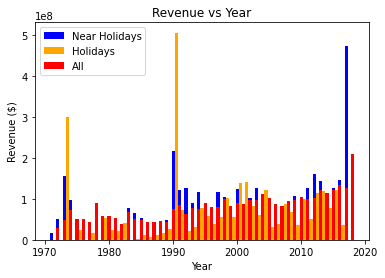

In [ ]:
def plot_revenue_vs_year_mixed():

    x = df.to_numpy()
    y = df.to_numpy()

    n_plot = 5380 # number of data points to plot

    width = 0.25

    M = df.shape[0]

    revenue_holidays = []
    year_holidays = []

    revenue_near_holidays = []
    year_near_holidays = []

    revenue_all = []
    year_all = []

    for i in range(M):
    if df.iloc[i]['Year'] > 1970:
        revenue_all.append(df.iloc[i]['revenue'])
        year_all.append(df.iloc[i]['Year'])
    if (df.iloc[i]['is_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
        revenue_holidays.append(df.iloc[i]['revenue'])
        year_holidays.append(df.iloc[i]['Year'])
    if (df.iloc[i]['is_near_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
        revenue_near_holidays.append(df.iloc[i]['revenue'])
        year_near_holidays.append(df.iloc[i]['Year'])

    width = 0.5

    revenue_holidays, year_holidays = plot_revenue_vs_year_helper(revenue_holidays, year_holidays)
    revenue_near_holidays, year_near_holidays = plot_revenue_vs_year_helper(revenue_near_holidays, year_near_holidays)
    revenue_all, year_all = plot_revenue_vs_year_helper(revenue_all, year_all)

    plt.bar(year_near_holidays, revenue_near_holidays,    color='blue', width = width, label="Near Holidays")

    plt.bar(year_holidays+width, revenue_holidays, color='orange', width = width, label="Holidays")

    plt.bar(year_all+2*width, revenue_all, color='red', width = width, label="All")
    plt.xlabel('Year')
    plt.ylabel('Revenue ($)')
    plt.title("Revenue vs Year")
    plt.legend()
    plt.show()

plot_revenue_vs_year_mixed()

### Revenue vs Days 

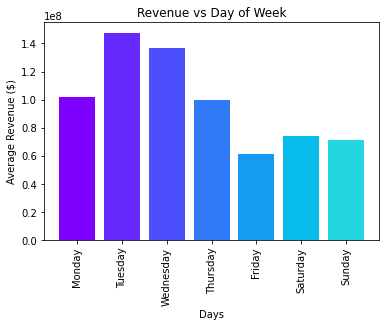

In [ ]:
def plot_days(x,y):
    colors = cm.rainbow(np.linspace(0, 1, 20))
    y = y.values
    y = y.reshape(-1)
    plt.bar(x,y,color=colors)    
    plt.xticks(rotation=90) 
    plt.xlabel('Days')
    plt.ylabel('Average Revenue ($)') 
    plt.title("Revenue vs Day of Week")
    plt.show()
    return


import calendar
def get_array_days(df):
    df_day_plot = df.groupby('Day')['revenue'].mean().reset_index()
    days = []
    for i in range(len(df_day_plot['Day'])):
    days.append(calendar.day_name[df_day_plot['Day'][i]])

    return df_day_plot,days


def plot_revenue_vs_days(df):
    df_day_plot,days = get_array_days(df)
    plot_days(days,df_day_plot['revenue'])

plot_revenue_vs_days(df)

### Revenue vs Year

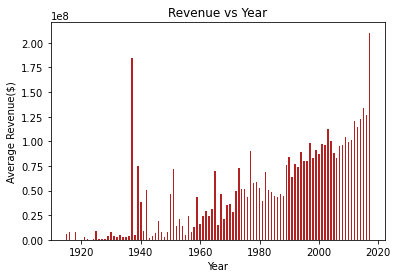

In [ ]:
def plot_year(x,y):
    idx     = np.argsort(y)
    y = np.array(y)[idx]
    x = np.array(x)[idx]
    plt.bar(x,y,width=0.5,color="firebrick")    
    plt.xlabel('Year')
    plt.ylabel('Average Revenue($)')
    plt.title("Revenue vs Year") 
    plt.show()
    return

def get_array_year(df):
    df_year_plot = df.groupby('Year')['revenue'].mean().reset_index()
    return df_year_plot

def plot_revenue_vs_year(df):
    df_year_plot = get_array_year(df)
    plot_year(df_year_plot['Year'],df_year_plot['revenue'])

plot_revenue_vs_year(df)

## Correlation Heat Map 

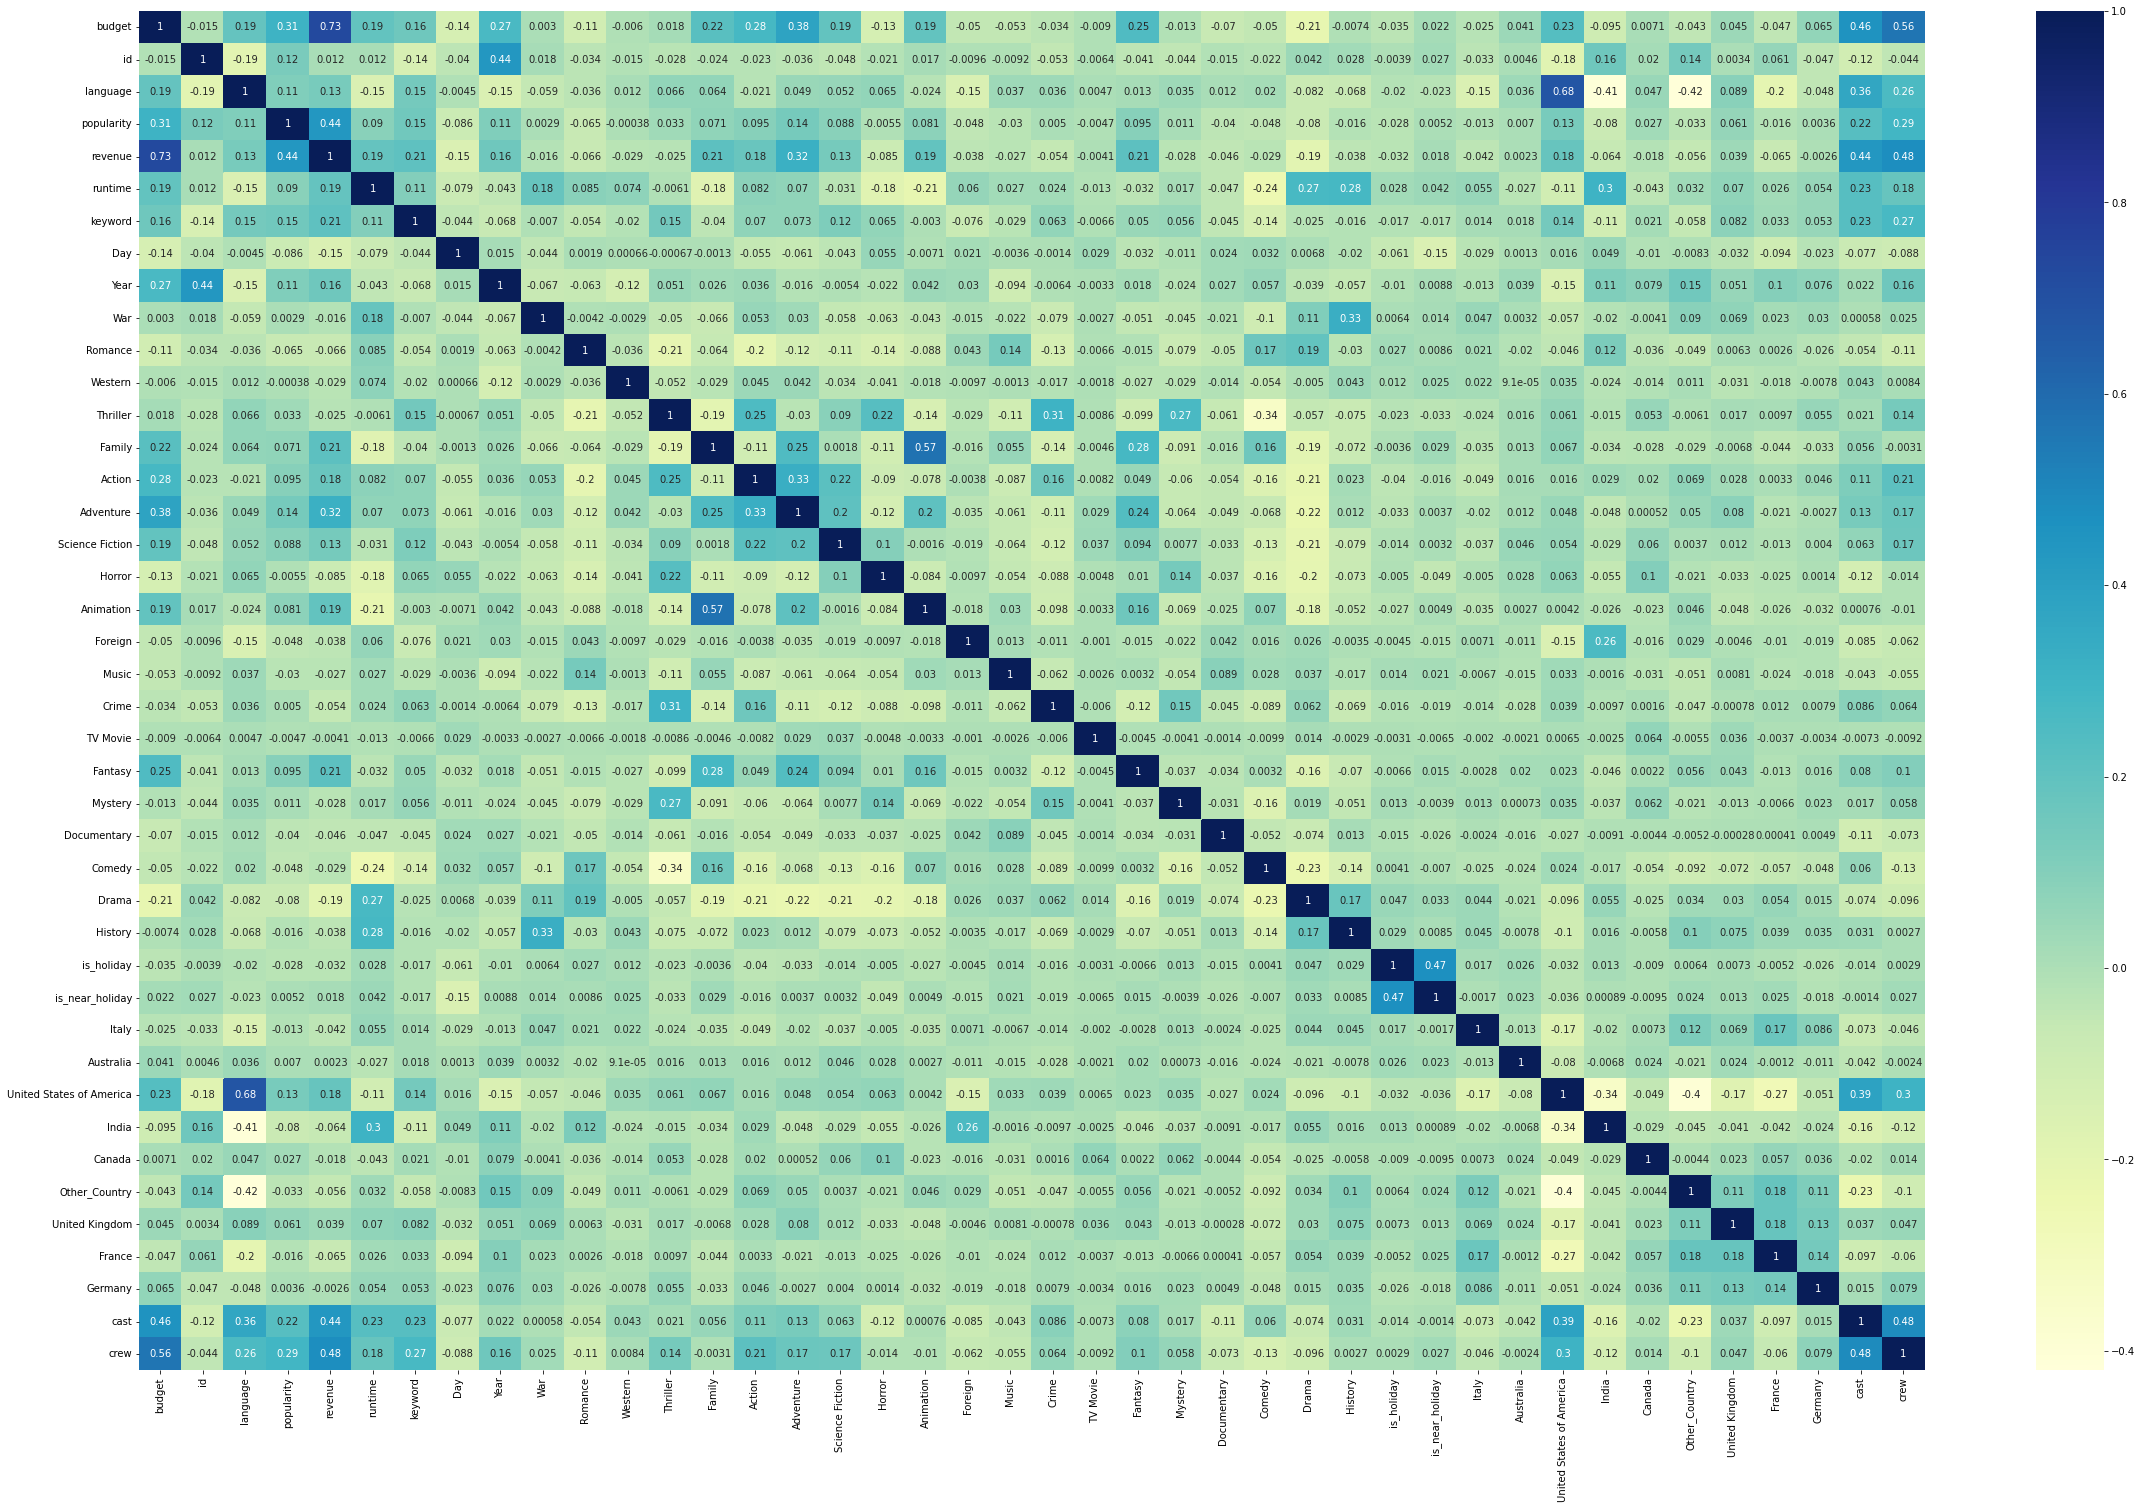

In [ ]:
plt.figure(figsize = (40,25))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)